In [1]:
# all the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import pprint
import copy
import seaborn as sns
from scipy.stats import itemfreq

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Imputer, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

/Users/gauravdesai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gauravdesai/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Notebook lavel configurations
warnings.filterwarnings('ignore')
pp = pprint.PrettyPrinter(indent=4)

In [3]:
# List input files, if not available please download from below url inot a /input.nosync folder
input_dir = 'input.nosync'
input_files = os.listdir(input_dir)
if input_files is None or len(input_files) < 10 :
    raise Exception('You do not have all the files in {} directory'.format(input_dir))

print('You have all the input files listed below')
pp.pprint(input_files)

You have all the input files listed below
[   'application_test.csv',
    '.DS_Store',
    'HomeCredit_columns_description.csv',
    'POS_CASH_balance.csv',
    'credit_card_balance.csv',
    'installments_payments.csv',
    'application_train.csv',
    'bureau.csv',
    'previous_application.csv',
    'bureau_balance.csv',
    'sample_submission.csv']


In [4]:
# Read application_train.csv
app_train = pd.read_csv(input_dir+'/application_train.csv')
print('Training data shape (Before Split): ', app_train.shape)
app_train.head()

Training data shape (Before Split):  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Move Target column to seperate object
app_train_labels = app_train['TARGET']
app_train = app_train.drop('TARGET', axis=1)

# split the training dataset into training (80%) and testing (20%)
split_ratio = 0.20
app_train_data, app_test_data, train_labels, test_labels = train_test_split(
    app_train, app_train_labels, test_size = split_ratio, random_state = 23 )

# Move SK_ID_CURR to different object so that it does not interfer with classifier
app_train_data_skid_curr = app_train_data['SK_ID_CURR']
#app_train_data = app_train_data.drop('SK_ID_CURR', axis=1)
app_test_data_skid_curr = app_test_data['SK_ID_CURR']
#app_test_data = app_test_data.drop('SK_ID_CURR', axis=1)

In [6]:
print('Training data shape: ', app_train_data.shape)
print('Training label shape: ', train_labels.shape)
print('Test data shape: ', app_test_data.shape)
print('Test label shape: ', test_labels.shape)

print('Training SK ID data shape: ', app_train_data_skid_curr.shape)
print('Test SK ID data shape: ', app_test_data_skid_curr.shape)

Training data shape:  (246008, 121)
Training label shape:  (246008,)
Test data shape:  (61503, 121)
Test label shape:  (61503,)
Training SK ID data shape:  (246008,)
Test SK ID data shape:  (61503,)


In [7]:
#Look for analmolies in data

print(list(app_train_data.columns))

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG

In [8]:
#1. CNT_CHILDREN => Max 19 children??
app_train_data['CNT_CHILDREN'].describe()
app_train_data['CNT_CHILDREN'].value_counts()
#Values above 6 are very few and should not affect our classifiers much. So can be ignored

0     172441
1      48771
2      21392
3       2974
4        328
5         69
6         16
7          7
14         2
12         2
10         2
19         1
11         1
9          1
8          1
Name: CNT_CHILDREN, dtype: int64

In [9]:
#2. DAYS_BIRTH => Looks ok, but do we really think need age in days? too much granularity?
#Since we will use scaling, this the days scale should get shrunk. So no issues here
(app_train_data['DAYS_BIRTH']/-365).describe()

count    246008.000000
mean         43.958896
std          11.965190
min          20.517808
25%          34.032877
50%          43.175342
75%          53.958904
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [10]:
#3. DAYS_EMPLOYED => 1000 years of employment doesn't look right. Check correkation of this 1000 years with target
# Make these NaN and create indicator column.Also may want to convert to years?
# Aanalyse again after removing 1000 years. 
app_train_data['DAYS_EMPLOYED'].describe() #max=365243
(app_train_data['DAYS_EMPLOYED']/365).describe() #max > 1000 in years
app_train_data_de = pd.DataFrame(app_train_data, columns=['DAYS_EMPLOYED'])
app_train_data_de['TARGET'] = train_labels
app_train_data_de.corr() #-0.044661 overall corr between two cols
app_train_data_de['ANOMOLY_DAYS_EMPLOYED']=app_train_data_de.apply(lambda row: 1 if row['DAYS_EMPLOYED']==365243 else 0, axis=1)
app_train_data_de.groupby(['ANOMOLY_DAYS_EMPLOYED']).agg(['sum','count'])
app_train_data_de.corr()#-0.045719 slightly more correlated but not significant

,DAYS_EMPLOYED,TARGET,ANOMOLY_DAYS_EMPLOYED
DAYS_EMPLOYED,1.000000,-0.044661,0.999888
TARGET,-0.044661,1.000000,-0.045719
ANOMOLY_DAYS_EMPLOYED,0.999888,-0.045719,1.000000


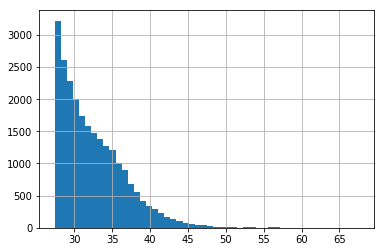

In [11]:
#4. DAYS_REGISTRATION => 4th quantile looks very wide (20.5 to 67.5).
# Check for any outlier
app_train_data['DAYS_REGISTRATION'].describe() #min=-24672, 25%       -7486.000000
#(app_train_data['DAYS_REGISTRATION']/-365).describe()
#(app_train_data['DAYS_REGISTRATION']/-365).hist(bins=50)
(app_train_data['DAYS_REGISTRATION'][app_train_data['DAYS_REGISTRATION']<-10000]/-365).hist(bins=50)

#There is no significant spike and distribution looks fine. No action needed

,DAYS_ID_PUBLISH,TARGET,ANOMOLY_DAYS_ID_PUBLISH,SPIKE_DAYS_ID_PUBLISH
DAYS_ID_PUBLISH,1.000000,-0.050282,0.315599,0.665867
TARGET,-0.050282,1.000000,-0.011469,-0.041179
ANOMOLY_DAYS_ID_PUBLISH,0.315599,-0.011469,1.000000,-0.144574
SPIKE_DAYS_ID_PUBLISH,0.665867,-0.041179,-0.144574,1.000000


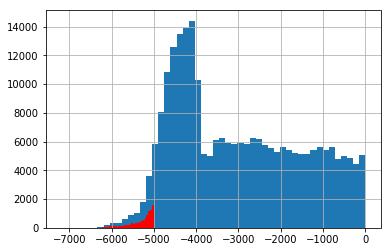

In [12]:
#5. DAYS_ID_PUBLISH => 4th quantile looks very wide (11 to 19).
# Check for any outlier
app_train_data['DAYS_ID_PUBLISH'].describe() #min -7197, -4299.000000
#(app_train_data['DAYS_ID_PUBLISH']/-365).describe()
app_train_data['DAYS_ID_PUBLISH'].hist(bins=50)
app_train_data['DAYS_ID_PUBLISH'][app_train_data['DAYS_ID_PUBLISH']<-5000].hist(bins=50, color='r')

# there is spike betwee -5k to -4k. Lets see the correlation

app_train_data_dip = pd.DataFrame(app_train_data, columns=['DAYS_ID_PUBLISH'])
app_train_data_dip['DAYS_ID_PUBLISH'] = -app_train_data_dip['DAYS_ID_PUBLISH']
app_train_data_dip['TARGET'] = train_labels
app_train_data_dip.corr() #0.050282

# for abnormal values
app_train_data_dip['ANOMOLY_DAYS_ID_PUBLISH']=app_train_data_dip['DAYS_ID_PUBLISH'] > 5000
app_train_data_dip.groupby(['ANOMOLY_DAYS_ID_PUBLISH']).agg(['sum','count'])
app_train_data_dip.corr() #-0.011469

#So yes the tail affects correlation but it is more of a tail than spike so lets keep it. useful for model

#lets observe spike between -4k to -5k
app_train_data_dip['SPIKE_DAYS_ID_PUBLISH']= app_train_data_dip.apply(lambda row: row['DAYS_ID_PUBLISH'] <5000 and row['DAYS_ID_PUBLISH'] > 4000, axis=1)
app_train_data_dip.groupby(['SPIKE_DAYS_ID_PUBLISH']).agg(['sum','count'])
app_train_data_dip.corr() #-0.041179, 1% different.
#Need more functional knowledge what this means

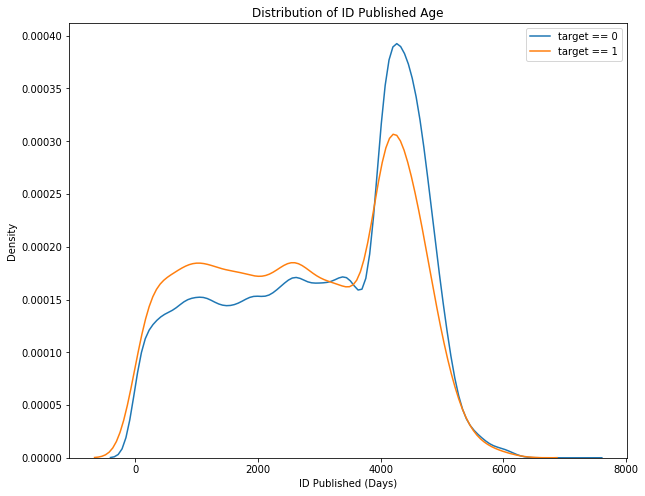

In [13]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_data_dip.loc[app_train_data_dip['TARGET'] == 0, 'DAYS_ID_PUBLISH'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train_data_dip.loc[app_train_data_dip['TARGET'] == 1, 'DAYS_ID_PUBLISH'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('ID Published (Days)'); plt.ylabel('Density'); plt.title('Distribution of ID Published Age');
# The mountain between 4k and 5k may mean something. need more business knowledge to make use of this finding

In [14]:
#6. CNT_FAM_MEMBERS => more than 10 family members? not many records so can be ignored
app_train_data['CNT_FAM_MEMBERS'].describe()
(app_train_data[app_train_data['CNT_FAM_MEMBERS']>10])['CNT_FAM_MEMBERS'].value_counts()
# Handful of records having large number of family members. Can be ignored

12.0    2
16.0    2
14.0    2
13.0    1
20.0    1
11.0    1
Name: CNT_FAM_MEMBERS, dtype: int64

In [15]:
#7. WEEKDAY_APPR_PROCESS_START => Nothing suspicious. 
# Weekdays columes quite averaged out while weekend counts go down as expected
# also the default distribution looks proportionate to the volume for that day
app_train_data['WEEKDAY_APPR_PROCESS_START'].describe()
app_train_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

app_train_data_weekday = pd.DataFrame()
app_train_data_weekday['WEEKDAY_APPR_PROCESS_START']=app_train_data['WEEKDAY_APPR_PROCESS_START']
app_train_data_weekday['TARGET'] = train_labels
app_train_data_weekday_grp=app_train_data_weekday.groupby(['WEEKDAY_APPR_PROCESS_START']).agg(['sum','count'])
app_train_data_weekday_grp=app_train_data_weekday_grp.rename(index=str
                , columns = {'sum':'DefaultCount','count':'TotalCount'})
app_train_data_weekday_grp[('TARGET', '%Default')] = app_train_data_weekday_grp[('TARGET', 'DefaultCount')] / app_train_data_weekday_grp[('TARGET', 'TotalCount')]
app_train_data_weekday_grp

TARGET                     
                           DefaultCount TotalCount  %Default
WEEKDAY_APPR_PROCESS_START                                  
FRIDAY                             3273      40297  0.081222
MONDAY                             3175      40796  0.077826
SATURDAY                           2142      27013  0.079295
SUNDAY                             1025      13003  0.078828
THURSDAY                           3284      40372  0.081344
TUESDAY                            3599      43057  0.083587
WEDNESDAY                          3391      41470  0.081770

In [16]:
#8. DAYS_LAST_PHONE_CHANGE => minimum 0 days is alarming. Someone just changed phone and applied for loan
# Lets probe this further for smaller values of DAYS_LAST_PHONE_CHANGE
app_train_data['DAYS_LAST_PHONE_CHANGE'].value_counts() #whooping 30k records with 0 days

app_train_data_dlpc_stats=(app_train_data['DAYS_LAST_PHONE_CHANGE']*-1).describe()
app_train_data_dlpc_stats['25%']


app_train_data_dlpc=pd.DataFrame()
app_train_data_dlpc['DAYS_LAST_PHONE_CHANGE']=app_train_data['DAYS_LAST_PHONE_CHANGE'] * -1
app_train_data_dlpc['YEARS_LAST_PHONE_CHANGE']=app_train_data_dlpc['DAYS_LAST_PHONE_CHANGE'] /365
app_train_data_dlpc['TARGET'] = train_labels
app_train_data_dlpc['RECENT_DAYS_LAST_PHONE_CHANGE']= app_train_data_dlpc['DAYS_LAST_PHONE_CHANGE']<1000
app_train_data_dlpc['FIRST_QUANTILE_DAYS_LAST_PHONE_CHANGE']= app_train_data_dlpc['DAYS_LAST_PHONE_CHANGE']<app_train_data_dlpc_stats['25%']
app_train_data_dlpc.groupby(['FIRST_QUANTILE_DAYS_LAST_PHONE_CHANGE','RECENT_DAYS_LAST_PHONE_CHANGE']).agg(['sum','count'])
app_train_data_dlpc.corr()[['TARGET']]



# We can see significant 

,TARGET
DAYS_LAST_PHONE_CHANGE,-0.055531
YEARS_LAST_PHONE_CHANGE,-0.055531
TARGET,1.000000
RECENT_DAYS_LAST_PHONE_CHANGE,0.052746
FIRST_QUANTILE_DAYS_LAST_PHONE_CHANGE,0.030804


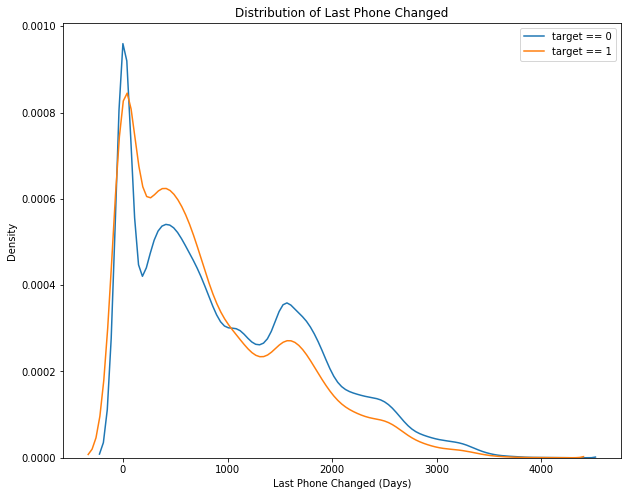

In [17]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_data_dlpc.loc[app_train_data_dlpc['TARGET'] == 0, 'DAYS_LAST_PHONE_CHANGE'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train_data_dlpc.loc[app_train_data_dlpc['TARGET'] == 1, 'DAYS_LAST_PHONE_CHANGE'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Last Phone Changed (Days)'); plt.ylabel('Density'); plt.title('Distribution of Last Phone Changed');
#The distribution looks fairly equal for both Target 0 and 1, so lets keep data as is

In [18]:
#Looks like first 1000 days mean something, so lets add this variable in main training and test data set
print('Before Shape',app_train_data.shape,app_test_data.shape)
app_train_data['RECENT_DAYS_LAST_PHONE_CHANGE']=(app_train_data['DAYS_LAST_PHONE_CHANGE']*-1)<1000
app_test_data['RECENT_DAYS_LAST_PHONE_CHANGE']=(app_test_data['DAYS_LAST_PHONE_CHANGE']*-1)<1000
print('After Shape',app_train_data.shape,app_test_data.shape)

Before Shape (246008, 121) (61503, 121)
After Shape (246008, 122) (61503, 122)


In [19]:
#9. AMT_REQ_CREDIT_BUREAU_YEAR => All the AMT_REQ_CREDIT_BUREAU_* columns have spike at the max values. 
#Need to probe further
app_train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()
app_train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

app_train_data_arcb = pd.DataFrame(data=app_train_data, columns=['AMT_REQ_CREDIT_BUREAU_HOUR'
                    ,'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON'
                    ,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'])
app_train_data_arcb['TARGET']=train_labels
#Replace NAN with 0
app_train_data_arcb.fillna(0, inplace=True)
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_HOUR_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_HOUR']==0
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_DAY_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_DAY']==0
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_WEEK_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_WEEK']==0
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_MON_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_MON']==0
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_QRT_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_QRT']==0
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_YEAR_ZERO'] = app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_YEAR']==0

app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_ALL_ZERO'] = app_train_data_arcb.apply(lambda row:
            row['AMT_REQ_CREDIT_BUREAU_HOUR_ZERO'] ==0
            and row['AMT_REQ_CREDIT_BUREAU_DAY_ZERO'] ==0
            and row['AMT_REQ_CREDIT_BUREAU_WEEK_ZERO'] ==0
            and row['AMT_REQ_CREDIT_BUREAU_MON_ZERO'] ==0
            and row['AMT_REQ_CREDIT_BUREAU_QRT_ZERO'] ==0
            and row['AMT_REQ_CREDIT_BUREAU_YEAR_ZERO'] ==0
            , axis=1)

app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_ATLEAST_ONE_ZERO'] = app_train_data_arcb.apply(lambda row:
            row['AMT_REQ_CREDIT_BUREAU_HOUR_ZERO'] ==0
            or row['AMT_REQ_CREDIT_BUREAU_DAY_ZERO'] ==0
            or row['AMT_REQ_CREDIT_BUREAU_WEEK_ZERO'] ==0
            or row['AMT_REQ_CREDIT_BUREAU_MON_ZERO'] ==0
            or row['AMT_REQ_CREDIT_BUREAU_QRT_ZERO'] ==0
            or row['AMT_REQ_CREDIT_BUREAU_YEAR_ZERO'] ==0
            , axis=1)

In [20]:
app_train_data_arcb['AMT_REQ_CREDIT_BUREAU_ATLEAST_ONE_ZERO'].describe()
app_train_data_arcb.corr()[['TARGET']]

,TARGET
AMT_REQ_CREDIT_BUREAU_HOUR,0.001220
AMT_REQ_CREDIT_BUREAU_DAY,0.002093
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002082
AMT_REQ_CREDIT_BUREAU_MON,-0.014193
AMT_REQ_CREDIT_BUREAU_QRT,-0.004854
AMT_REQ_CREDIT_BUREAU_YEAR,0.005438
TARGET,1.000000
AMT_REQ_CREDIT_BUREAU_HOUR_ZERO,-0.001299
AMT_REQ_CREDIT_BUREAU_DAY_ZERO,-0.003560
AMT_REQ_CREDIT_BUREAU_WEEK_ZERO,0.002700


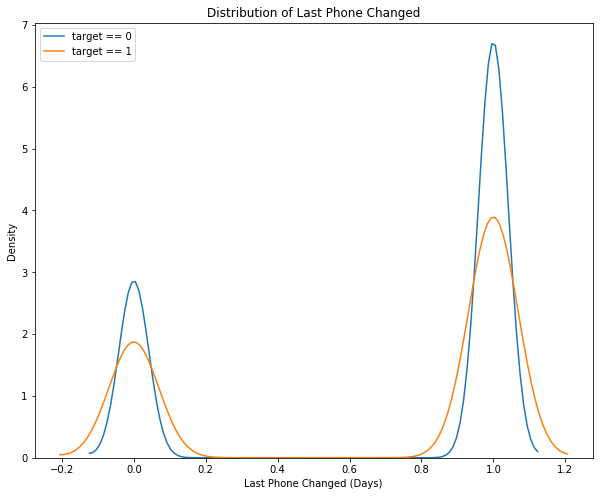

In [21]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_data_arcb.loc[app_train_data_arcb['TARGET'] == 0, 'AMT_REQ_CREDIT_BUREAU_ATLEAST_ONE_ZERO'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train_data_arcb.loc[app_train_data_arcb['TARGET'] == 1, 'AMT_REQ_CREDIT_BUREAU_ATLEAST_ONE_ZERO'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Last Phone Changed (Days)'); plt.ylabel('Density'); plt.title('Distribution of Last Phone Changed');
#The distribution looks fairly equal for both Target 0 and 1, so lets keep data as is

In [22]:
# Function to calculate missing values by column 
def get_missing_values_stats(data, label):
        # Total missing values
        missing_values = data.isnull().sum()
        
        # Percentage of missing values
        missing_values_percent = 100 * missing_values / len(data)
        
        # Percentage of missing values when Target = 0
        missing_values_percent_target_0 = 100 * data[label.values==0].isnull().sum() / len(data[label.values==0])
        
        # Percentage of missing values when Target = 1
        missing_values_percent_target_1 = 100 * data[label.values==1].isnull().sum() / len(data[label.values==1])       
        
        
        # results table
        status_table = pd.concat([missing_values, missing_values_percent
                                  , missing_values_percent_target_0, missing_values_percent_target_1
                                 , abs(missing_values_percent_target_0-missing_values_percent_target_1)]
                                 , axis=1)
        
        # Give Headers
        status_table = status_table.rename(
        columns = {0 : 'Missing Count', 1 : '%Total'
                  ,2 : '%Target=0', 3 : '%Target=1'
                  ,4 : '%Diff'})
        
        
        
        # Remove columns not having any missing values
        status_table = status_table[status_table['Missing Count'] != 0]
        status_table = status_table.drop('Missing Count', axis=1)

        
        # Sort the table by percentage of missing descending
        status_table = status_table.sort_values(
        '%Diff', ascending=False)
        
        print ("Data has {} columns out of which {} columns that have missing values"
               .format(str(data.shape[1]),str(status_table.shape[0])))
        
        return status_table
    
#print(app_train_data.shape,type(app_train_data))
#print(train_labels.shape,type(train_labels))
#app_train_data[train_labels.values==0]
train_missing_values = get_missing_values_stats(app_train_data, train_labels)
print('First 30 columns with highest %Diff are\n')
print(train_missing_values.head(30))

Data has 122 columns out of which 67 columns that have missing values
First 30 columns with highest %Diff are

                                 %Total  %Target=0  %Target=1     %Diff
FLOORSMAX_AVG                 49.760577  49.140055  56.815325  7.675270
FLOORSMAX_MODE                49.760577  49.140055  56.815325  7.675270
FLOORSMAX_MEDI                49.760577  49.140055  56.815325  7.675270
EMERGENCYSTATE_MODE           47.392361  46.772717  54.437126  7.664409
ENTRANCES_MODE                50.333729  49.714973  57.368395  7.653422
ENTRANCES_AVG                 50.333729  49.714973  57.368395  7.653422
ENTRANCES_MEDI                50.333729  49.714973  57.368395  7.653422
TOTALAREA_MODE                48.263065  47.644382  55.296898  7.652516
YEARS_BEGINEXPLUATATION_MODE  48.770365  48.159155  55.719242  7.560087
YEARS_BEGINEXPLUATATION_AVG   48.770365  48.159155  55.719242  7.560087
YEARS_BEGINEXPLUATATION_MEDI  48.770365  48.159155  55.719242  7.560087
ELEVATORS_MEDI           

In [23]:
print('Number of columns with more than 3% difference in number of missing values when Target is 0 vs 1 = {}'
      .format(sum(train_missing_values['%Diff'] > 3)))

Number of columns with more than 3% difference in number of missing values when Target is 0 vs 1 = 57


Out of 68 columns having missing values 58 columns have more than 3% difference between % of missing values for Target = 0 vs Target = 1 Hence this looks like significant information. So while we impute the Nulls with 0 we need to capture that these values were Null in an indicator column

In [24]:
#Polynomial features
ext_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
app_train_data_ext = pd.DataFrame(data=app_train_data, columns=ext_columns)

app_train_data_ext.fillna(0, inplace=True)
print(app_train_data_ext.shape)
#print(app_train_data_ext.head(5))
#imputer = Imputer(strategy = 'median')
#app_train_data_ext = imputer.fit_transform(app_train_data_ext)


app_train_data_ext['TARGET'] = train_labels
#print(app_train_data_ext.head(5))
print(app_train_data_ext.corr()) #these fields are intercorrelated. Worth finding higher degree corr

(246008, 3)
              EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_1      1.000000      0.113852      0.039925 -0.065360
EXT_SOURCE_2      0.113852      1.000000      0.097264 -0.159892
EXT_SOURCE_3      0.039925      0.097264      1.000000 -0.120021
TARGET           -0.065360     -0.159892     -0.120021  1.000000


In [25]:
app_train_data_ext=app_train_data_ext.drop('TARGET', axis=1)


poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(app_train_data_ext)
app_train_data_ext=poly_transformer.transform(app_train_data_ext)
print(app_train_data_ext.shape)
#print(app_train_data_ext[:5,])

(246008, 20)


In [26]:
ploy_feature_names = poly_transformer.get_feature_names(input_features = ext_columns)
print('ploy_feature_names=')
pp.pprint(ploy_feature_names)
app_train_data_ext = pd.DataFrame(app_train_data_ext, 
                             columns = ploy_feature_names)
#app_train_data_ext.head(5)
print(app_train_data_ext.shape)

ploy_feature_names=
[   '1',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'EXT_SOURCE_1^2',
    'EXT_SOURCE_1 EXT_SOURCE_2',
    'EXT_SOURCE_1 EXT_SOURCE_3',
    'EXT_SOURCE_2^2',
    'EXT_SOURCE_2 EXT_SOURCE_3',
    'EXT_SOURCE_3^2',
    'EXT_SOURCE_1^3',
    'EXT_SOURCE_1^2 EXT_SOURCE_2',
    'EXT_SOURCE_1^2 EXT_SOURCE_3',
    'EXT_SOURCE_1 EXT_SOURCE_2^2',
    'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
    'EXT_SOURCE_1 EXT_SOURCE_3^2',
    'EXT_SOURCE_2^3',
    'EXT_SOURCE_2^2 EXT_SOURCE_3',
    'EXT_SOURCE_2 EXT_SOURCE_3^2',
    'EXT_SOURCE_3^3']
(246008, 20)


In [27]:
app_train_data_ext=app_train_data_ext.assign(TARGET=train_labels.values)
app_train_data_ext_poly_corr=app_train_data_ext.corr()['TARGET'].sort_values()
#print(app_train_data_ext_poly_corr.head(5))
#print(app_train_data_ext_poly_corr.tail(5))
print(app_train_data_ext_poly_corr)

EXT_SOURCE_2                             -0.159892
EXT_SOURCE_2 EXT_SOURCE_3                -0.151018
EXT_SOURCE_2^2                           -0.149866
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.146631
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.146023
EXT_SOURCE_2^3                           -0.140803
EXT_SOURCE_3^2                           -0.128649
EXT_SOURCE_3^3                           -0.122689
EXT_SOURCE_3                             -0.120021
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.089343
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.086495
EXT_SOURCE_1^2 EXT_SOURCE_2              -0.086407
EXT_SOURCE_1 EXT_SOURCE_2                -0.084288
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.083434
EXT_SOURCE_1^2 EXT_SOURCE_3              -0.082643
EXT_SOURCE_1 EXT_SOURCE_3                -0.082260
EXT_SOURCE_1^3                           -0.075991
EXT_SOURCE_1^2                           -0.075920
EXT_SOURCE_1                             -0.065360
TARGET                         

In [28]:
# Read bureau.csv = > Past Credit Accounts data
bureau_data = pd.read_csv(input_dir+'/bureau.csv')
print('Bureau data shape : ', bureau_data.shape)
bureau_data.head()

Bureau data shape :  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [117]:
#bureau_data[bureau_data['AMT_CREDIT_SUM_OVERDUE']>0]
agg_columns = ['CNT_CREDIT_PROLONG','AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT'
               , 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']
bureau_data_sk_id = bureau_data.groupby(['SK_ID_CURR'],as_index=False)[agg_columns].sum()


In [118]:
print('Number of unique SK_ID_CURR in bureau data',len(bureau_data_sk_id))
print('Number of unique SK_ID_CURR in bureau data with overdue amount',
      len(bureau_data_sk_id[bureau_data_sk_id['AMT_CREDIT_SUM_OVERDUE']>0]))

bureau_data_sk_id[bureau_data_sk_id['AMT_CREDIT_SUM_OVERDUE']>0].head(5)

Number of unique SK_ID_CURR in bureau data 305811
Number of unique SK_ID_CURR in bureau data with overdue amount 3801


,SK_ID_CURR,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
103,100120,0,368910.00,108837.000,0.0,166.50
139,100162,0,3101292.72,1486351.845,0.0,13.50
298,100341,0,731285.46,204894.000,0.0,459.00
306,100349,0,3069684.00,692905.500,0.0,19359.00
405,100472,0,900000.00,874039.500,0.0,18920.25


In [120]:
# find correlation of aggregated bureau data with target
bureau_data_sk_id_target = pd.DataFrame()
bureau_data_sk_id_target['SK_ID_CURR'] = app_train_data_skid_curr
bureau_data_sk_id_target['TARGET'] = train_labels
bureau_data_sk_id_target['AMT_INCOME_TOTAL'] = app_train_data['AMT_INCOME_TOTAL']
#print(bureau_data_sk_id_target.columns)
#print(bureau_data_sk_id.columns)
bureau_data_sk_id_target = bureau_data_sk_id_target.merge(bureau_data_sk_id, on = 'SK_ID_CURR', how = 'inner')

bureau_data_sk_id_target['AMT_DEBT_TO_INCOME_RATION'] = bureau_data_sk_id_target['AMT_CREDIT_SUM_DEBT']/bureau_data_sk_id_target['AMT_INCOME_TOTAL']

print(len(bureau_data_sk_id_target))
bureau_data_sk_id_target.head(5)

210752


,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DEBT_TO_INCOME_RATION
0,195470,0,157500.0,0,148500.000,0.0,0.0,0.0,0.000000
1,216988,0,270000.0,0,2933631.000,1095282.0,0.0,0.0,4.056600
2,369975,0,157500.0,0,1599568.740,1442335.5,0.0,0.0,9.157686
3,349936,0,180000.0,0,971102.745,0.0,0.0,0.0,0.000000
4,200204,0,54000.0,0,218610.000,0.0,0.0,0.0,0.000000


SK_ID_CURR                  -0.000980
TARGET                       1.000000
AMT_INCOME_TOTAL            -0.000129
CNT_CREDIT_PROLONG           0.003758
AMT_CREDIT_SUM              -0.016468
AMT_CREDIT_SUM_DEBT          0.006363
AMT_CREDIT_SUM_LIMIT        -0.010057
AMT_CREDIT_SUM_OVERDUE       0.014530
AMT_DEBT_TO_INCOME_RATION    0.014918
Name: TARGET, dtype: float64


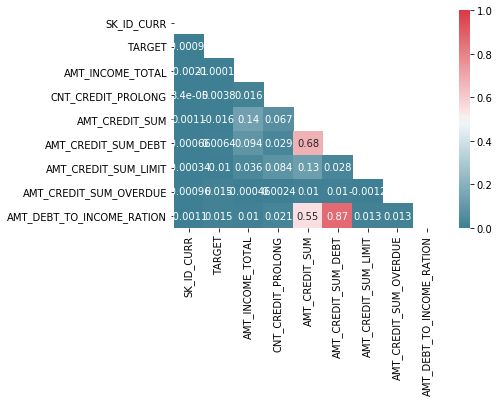

In [122]:
corr = bureau_data_sk_id_target.corr()
print(corr['TARGET'])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask)

In [158]:
# Read POS_CASH_balance.csv = > Past POS credit history
pos_cash_balance_data = pd.read_csv(input_dir+'/POS_CASH_balance.csv')
print('pos_cash_balance_data shape : ', pos_cash_balance_data.shape)
pos_cash_balance_data.head()

pos_cash_balance_data shape :  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [161]:
#bureau_data[bureau_data['AMT_CREDIT_SUM_OVERDUE']>0]
agg_columns = ['MONTHS_BALANCE','CNT_INSTALMENT_FUTURE','SK_DPD_DEF', 'SK_DPD']
pos_cash_balance_data_sk_id = pos_cash_balance_data.groupby(['SK_ID_CURR'],as_index=False)[agg_columns].mean()
pos_cash_balance_data_sk_id.head(5)

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD_DEF,SK_DPD
0,100001,-72.555556,1.444444,0.777778,0.777778
1,100002,-10.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,5.785714,0.000000,0.000000
3,100004,-25.500000,2.250000,0.000000,0.000000
4,100005,-20.000000,7.200000,0.000000,0.000000


In [162]:
# find correlation of aggregated bureau data with target
pos_cash_balance_data_sk_id_target = pd.DataFrame()
pos_cash_balance_data_sk_id_target['SK_ID_CURR'] = app_train_data_skid_curr
pos_cash_balance_data_sk_id_target['TARGET'] = train_labels
pos_cash_balance_data_sk_id_target = pos_cash_balance_data_sk_id_target.merge(pos_cash_balance_data_sk_id, on = 'SK_ID_CURR', how = 'inner')
print(len(bureau_data_sk_id_target))
pos_cash_balance_data_sk_id_target.head(5)

210752


,SK_ID_CURR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,SK_DPD_DEF,SK_DPD
0,195470,0,-37.252427,15.990291,0.000000,0.000000
1,216988,0,-43.596154,8.692308,0.000000,0.000000
2,200986,1,-15.846154,38.211538,0.865385,0.865385
3,369975,0,-11.533333,5.600000,0.000000,0.000000
4,349936,0,-29.431373,13.274510,0.000000,0.000000


SK_ID_CURR              -0.000974
TARGET                   1.000000
MONTHS_BALANCE           0.033520
CNT_INSTALMENT_FUTURE    0.028845
SK_DPD_DEF               0.001690
SK_DPD                   0.004306
Name: TARGET, dtype: float64


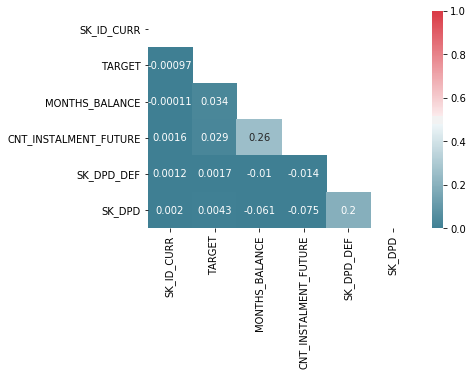

In [163]:
corr = pos_cash_balance_data_sk_id_target.corr()
print(corr['TARGET'])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask)

In [164]:
# Read credit_card_balance.csv = > Past  credit card history
credit_card_balance_data = pd.read_csv(input_dir+'/credit_card_balance.csv')
print('credit_card_balance_data shape : ', credit_card_balance_data.shape)
credit_card_balance_data.head()

credit_card_balance_data shape :  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [165]:
credit_card_balance_data['CNT_INSTALMENT_MATURE_CUM_NORMALIZE'] = credit_card_balance_data['CNT_INSTALMENT_MATURE_CUM']/credit_card_balance_data['MONTHS_BALANCE']
interesting_columns =['MONTHS_BALANCE','AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECIVABLE'
                      , 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM'
                      , 'SK_DPD','SK_DPD_DEF','CNT_INSTALMENT_MATURE_CUM_NORMALIZE']
credit_card_balance_data[interesting_columns].head(10)

,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE
0,-6,56.970,1800.000,0.000,0.000,0.000,35.0,0,0,-5.833333
1,-1,63975.555,2250.000,64875.555,60175.080,64875.555,69.0,0,0,-69.000000
2,-7,31815.225,2250.000,31460.085,26926.425,31460.085,30.0,0,0,-4.285714
3,-4,236572.110,11925.000,233048.970,224949.285,233048.970,10.0,0,0,-2.500000
4,-1,453919.455,27000.000,453919.455,443044.395,453919.455,101.0,0,0,-101.000000
5,-7,82903.815,3825.000,82773.315,80519.040,82773.315,2.0,7,0,-0.285714
6,-6,353451.645,15750.000,351881.145,345433.860,351881.145,6.0,0,0,-1.000000
7,-7,47962.125,0.000,47962.125,44735.310,47962.125,51.0,0,0,-7.285714
8,-4,291543.075,4093.515,286831.575,285376.410,286831.575,3.0,0,0,-0.750000
9,-5,201261.195,45000.000,197224.695,192793.275,197224.695,38.0,0,0,-7.600000


In [166]:
#bureau_data[bureau_data['AMT_CREDIT_SUM_OVERDUE']>0]
agg_columns = interesting_columns
credit_card_balance_data_sk_id = credit_card_balance_data.groupby(['SK_ID_CURR'],as_index=False)[agg_columns].mean()
credit_card_balance_data_sk_id.head(5)

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE
0,100006,-3.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100011,-38.5,54482.111149,4520.067568,54433.179122,52402.088919,54433.179122,25.767123,0.000000,0.000000,-1.642171
2,100013,-48.5,18159.919219,6817.172344,18101.079844,17255.559844,18101.079844,18.719101,0.010417,0.010417,-1.212239
3,100021,-10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100023,-7.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
# find correlation of aggregated bureau data with target
credit_card_balance_data_sk_id_target = pd.DataFrame()
credit_card_balance_data_sk_id_target['SK_ID_CURR'] = app_train_data_skid_curr
credit_card_balance_data_sk_id_target['TARGET'] = train_labels
credit_card_balance_data_sk_id_target = credit_card_balance_data_sk_id_target.merge(credit_card_balance_data_sk_id, on = 'SK_ID_CURR', how = 'inner')

credit_card_balance_data_sk_id_target['AMT_PAYMENT_TO_RECEIVABLE_RATIO'] = credit_card_balance_data_sk_id_target['AMT_PAYMENT_TOTAL_CURRENT']/credit_card_balance_data_sk_id_target['AMT_TOTAL_RECEIVABLE']


print(len(credit_card_balance_data_sk_id_target))
credit_card_balance_data_sk_id_target.head(5)

69481


,SK_ID_CURR,TARGET,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_MATURE_CUM_NORMALIZE,AMT_PAYMENT_TO_RECEIVABLE_RATIO
0,147192,0,-4.5,124762.275000,1925.268750,124663.353750,123444.990000,124663.353750,2.625000,0.0,0.0,-1.393750,0.015444
1,375891,0,-17.0,22318.841613,9333.399194,22058.422258,21169.798548,22058.422258,3.777778,0.0,0.0,-0.425519,0.423122
2,188595,0,-4.0,0.000000,17139.953571,0.000000,0.000000,0.000000,0.285714,0.0,0.0,-0.214286,inf
3,382751,0,-7.5,298585.436786,40483.485000,298832.901429,291111.306429,298832.901429,4.785714,0.0,0.0,-1.808704,0.135472
4,406688,0,-18.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,NaN


CNT_INSTALMENT_MATURE_CUM_NORMALIZE   -0.036166
CNT_INSTALMENT_MATURE_CUM             -0.027930
AMT_PAYMENT_TO_RECEIVABLE_RATIO       -0.004656
SK_DPD                                -0.002130
SK_ID_CURR                            -0.002116
SK_DPD_DEF                             0.008902
AMT_PAYMENT_TOTAL_CURRENT              0.022154
MONTHS_BALANCE                         0.060853
AMT_RECEIVABLE_PRINCIPAL               0.085428
AMT_RECIVABLE                          0.085886
AMT_TOTAL_RECEIVABLE                   0.085899
AMT_BALANCE                            0.086596
TARGET                                 1.000000
Name: TARGET, dtype: float64


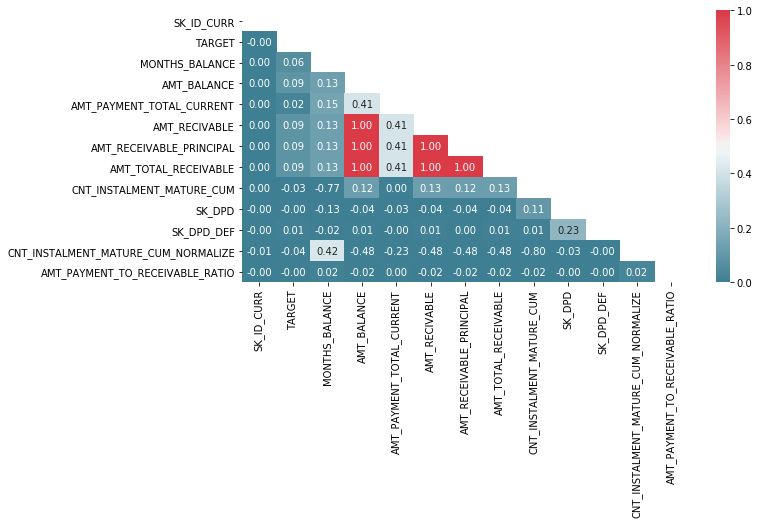

In [179]:
corr = credit_card_balance_data_sk_id_target.corr()
print(corr['TARGET'].sort_values())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap = cmap, vmin=0, vmax=1, annot=True, mask=mask, fmt=".2f")

In [150]:
credit_card_balance_data_sk_id_target[credit_card_balance_data_sk_id_target['TARGET']==1].describe()

,SK_ID_CURR,TARGET,MONTHS_BALANCE,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,6054.000000,6054.0,6054.000000,6.054000e+03,6.054000e+03,6.054000e+03,6.054000e+03,6.054000e+03,6054.000000,6054.000000,6054.000000
mean,277695.426825,1.0,-965.846383,2.387430e+06,2.776016e+05,2.375819e+06,2.289349e+06,2.376688e+06,549.884374,319.431120,38.578130
std,102594.804872,0.0,1550.957910,3.231866e+06,4.000594e+05,3.226671e+06,3.106519e+06,3.228810e+06,1088.678955,4074.555689,2045.692604
min,100047.000000,1.0,-5089.000000,-1.613700e+02,0.000000e+00,-8.622967e+04,-1.613700e+02,-8.622967e+04,0.000000,0.000000,0.000000
25%,190351.250000,1.0,-819.000000,1.433293e+05,2.153882e+04,1.386382e+05,1.351929e+05,1.386382e+05,10.000000,0.000000,0.000000
50%,276091.000000,1.0,-153.000000,1.062114e+06,1.294687e+05,1.051405e+06,1.014657e+06,1.051405e+06,45.000000,0.000000,0.000000
75%,368769.500000,1.0,-45.000000,3.305501e+06,3.836821e+05,3.284341e+06,3.173097e+06,3.284341e+06,360.000000,0.000000,0.000000
max,456233.000000,1.0,-1.000000,2.484727e+07,6.617733e+06,2.484727e+07,2.401981e+07,2.484727e+07,6225.000000,124412.000000,124412.000000
